In [1]:
#importing required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv(r"C:\Users\abinc\Downloads\DSA\TCSiON\train.csv")

In [3]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [4]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [5]:
df.shape

(913000, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [7]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
print("Start date: ", df['date'].min())
print("End date: ", df['date'].max())

Start date:  2013-01-01
End date:  2017-12-31


* We have daily sales data for five years, starting from 27-12-2013 to 31-12-2017.
* Using this historical data, we need to forecast the demand expected in the next 6 months.

**Data Preprocessing**

In [9]:
#converting date column to datetime
df['date']=pd.to_datetime(df['date'])

In [10]:
#Checking missing values
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

There is no null values

In [11]:
#Checking Duplicates
df[df.duplicated()]

,date,store,item,sales


There is no duplicated values

In [12]:
df.groupby(['store'])['item'].nunique()

store
1     50
2     50
3     50
4     50
5     50
6     50
7     50
8     50
9     50
10    50
Name: item, dtype: int64

The dataset consists of 10 store and each store has 50 unique items

In [13]:
#Indexing Time Series data
df.set_index('date',inplace=True)

In [14]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


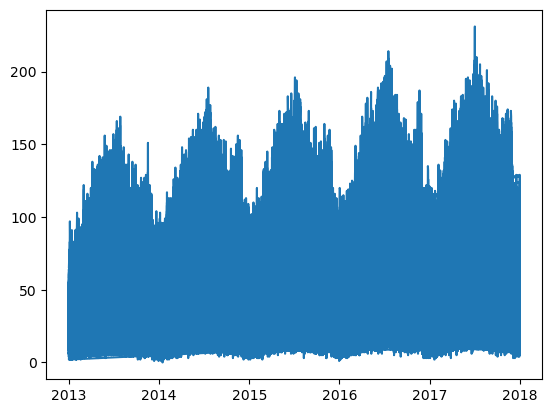

In [15]:
plt.plot(df.index, df['sales'])

In [16]:
df['sales'].describe()

count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64

In [17]:
print('Value at 95th Percentile:',round(np.percentile(df['sales'],95),3))
print('Value at 97th Percentile:',round(np.percentile(df['sales'],97),3))
print('Value at 99th Percentile:',round(np.percentile(df['sales'],99),3))

Value at 95th Percentile: 107.0
Value at 97th Percentile: 117.0
Value at 99th Percentile: 135.0


<AxesSubplot:xlabel='sales'>

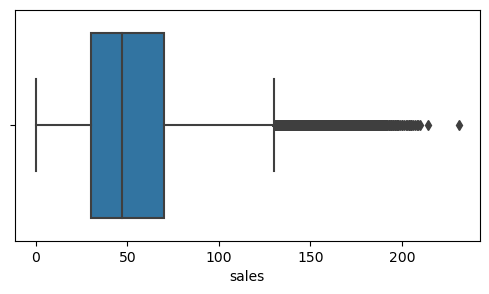

In [18]:
plt.figure(figsize = (6,3))
sns.boxplot(df['sales'])

we are moving with outliers

In [19]:
# Grouping 'df' by the "store" column and aggregating the "sales" column using various functions
aggregated_data = df.groupby(["store"]).agg({"sales": ["sum", "mean", "median", "std"]})
aggregated_data

sales                             
           sum       mean median        std
store                                      
1      4315603  47.268379   44.0  24.006252
2      6120128  67.033165   62.0  33.595810
3      5435144  59.530602   55.0  29.974102
4      5012639  54.902946   51.0  27.733097
5      3631016  39.770164   37.0  20.365757
6      3627670  39.733516   37.0  20.310451
7      3320009  36.363735   34.0  18.684825
8      5856169  64.142048   60.0  32.231751
9      5025976  55.049025   51.0  27.832186
10     5360158  58.709288   54.0  29.554994

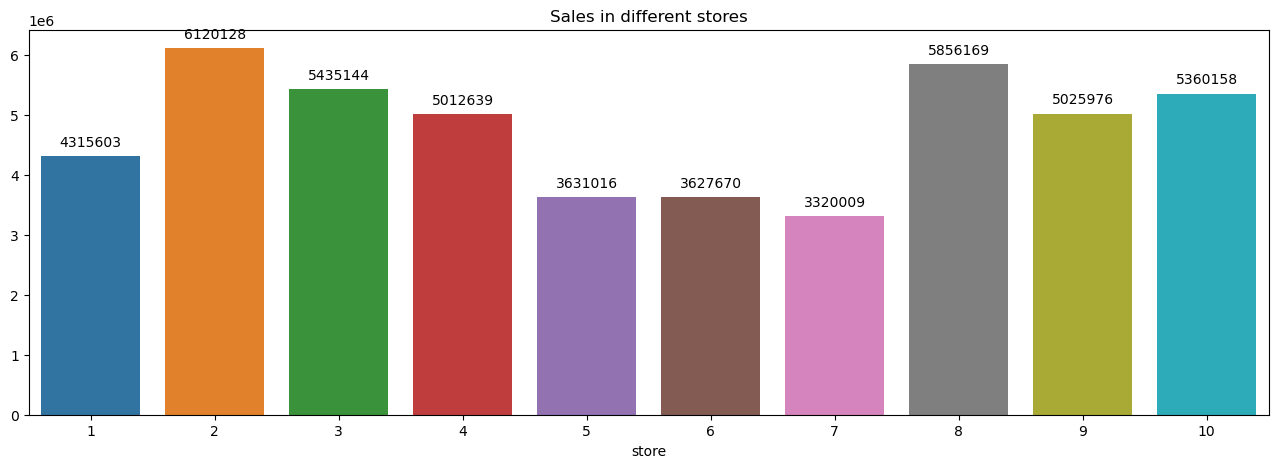

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 5))
plt.title("Sales in different stores")

# Access the 'sum' sub-column under 'sales'
sales_sum = aggregated_data['sales']['sum']

ax = sns.barplot(x=sales_sum.index, y=sales_sum.values)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

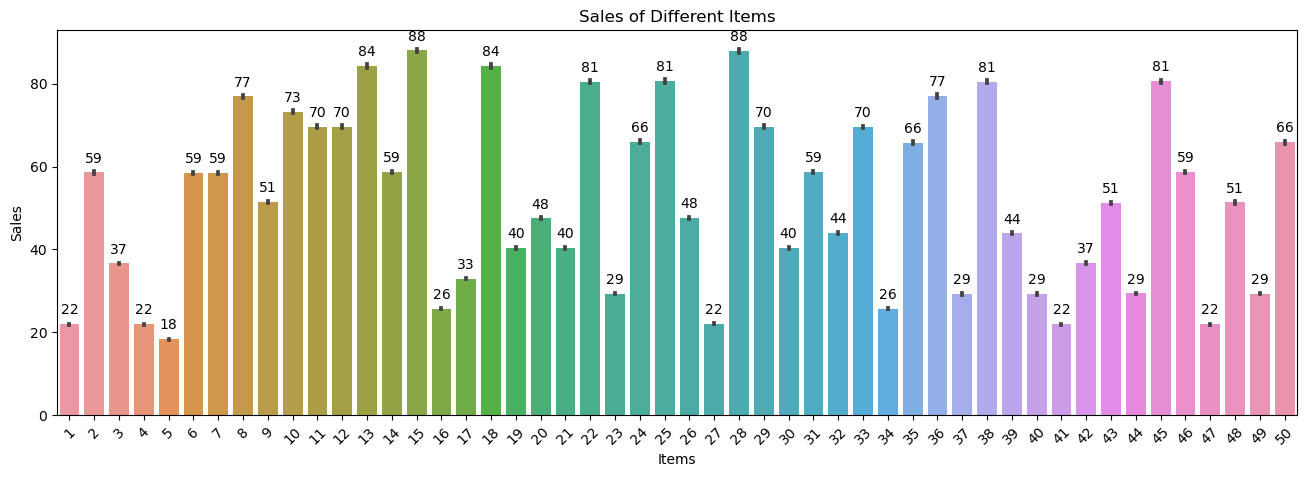

In [21]:
plt.figure(figsize=(16, 5))
plt.title("Sales of Different Items")

ax = sns.barplot(x=df['item'], y=df['sales'])

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45)  
plt.xlabel("Items")      
plt.ylabel("Sales")    

plt.show()

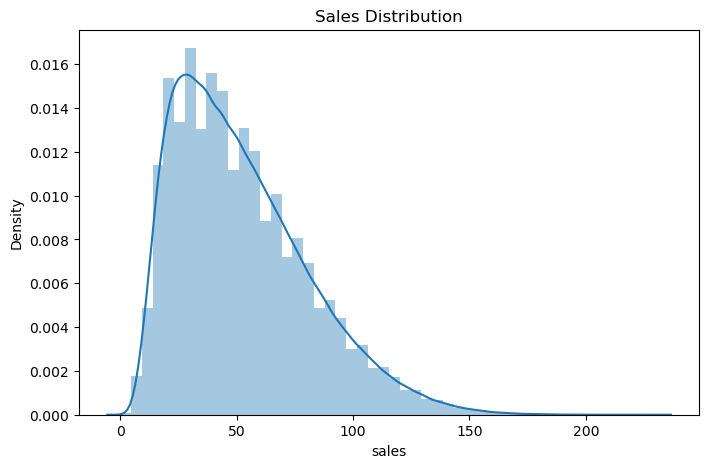

In [22]:
plt.figure(figsize = (8,5))
sns.distplot(df['sales'])
plt.title('Sales Distribution')
plt.show()

### Store 1 

In [23]:
df_store1 = df[df['store'] == 1]
df_store1

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10
...,...,...,...
2017-12-27,1,50,38
2017-12-28,1,50,52
2017-12-29,1,50,59


In [24]:
df_store1.shape

(91300, 3)

In [25]:
df_store1.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91300 entries, 2013-01-01 to 2017-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   store   91300 non-null  int64
 1   item    91300 non-null  int64
 2   sales   91300 non-null  int64
dtypes: int64(3)
memory usage: 2.8 MB


In [26]:
#daily sales of all products 
store1_daily = df_store1.groupby('date')['sales'].sum().reset_index()
store1_daily

,date,sales
0,2013-01-01,1316
1,2013-01-02,1264
2,2013-01-03,1305
3,2013-01-04,1452
4,2013-01-05,1499
...,...,...
1821,2017-12-27,1837
1822,2017-12-28,1951
1823,2017-12-29,2116
1824,2017-12-30,2304


In [27]:
#Time Resampling
store1_daily['date'] = pd.to_datetime(store1_daily['date'])
store1_daily.set_index('date', inplace=True)

In [28]:
store1_monthly=store1_daily.resample(rule='MS').mean()
store1_monthly

,sales
date,
2013-01-01,1325.064516
2013-02-01,1475.214286
2013-03-01,1800.870968
2013-04-01,2050.766667
2013-05-01,2234.580645
2013-06-01,2384.366667
2013-07-01,2500.870968
2013-08-01,2249.838710
2013-09-01,2080.266667


<AxesSubplot:xlabel='date'>

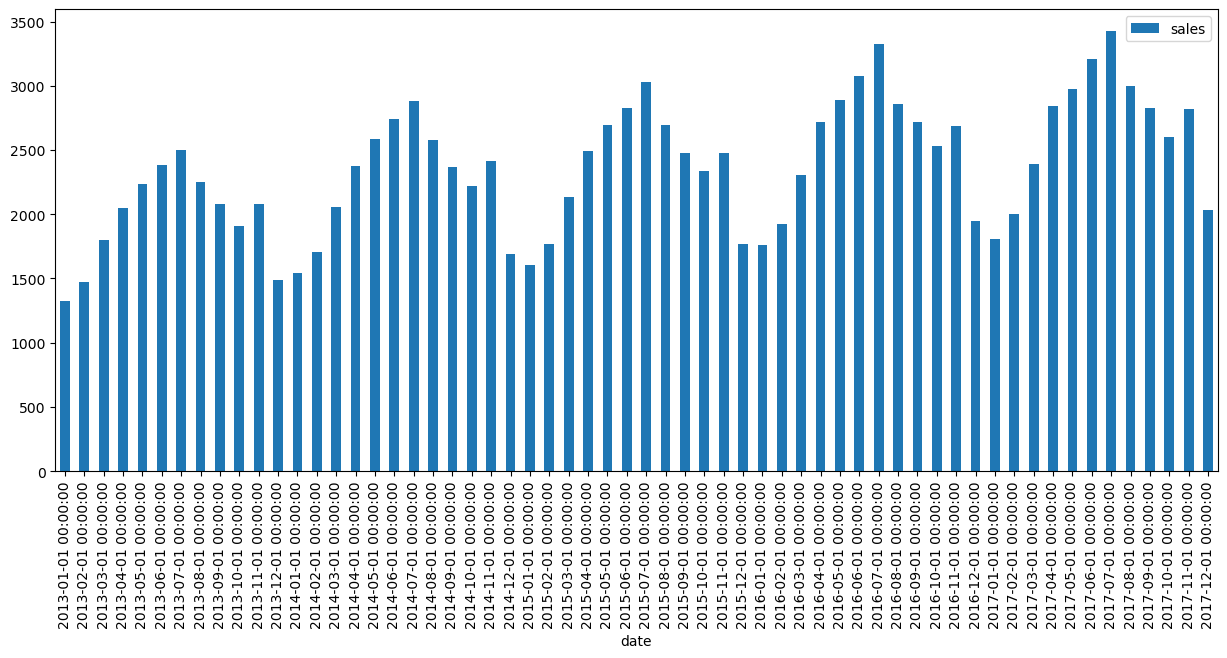

In [29]:
store1_daily.resample(rule='MS').mean().plot(kind='bar',figsize=(15,6))

In [30]:
store1_yearly=store1_daily.resample(rule='AS').mean()
store1_yearly

,sales
date,
2013-01-01,1966.684932
2014-01-01,2265.167123
2015-01-01,2360.849315
2016-01-01,2561.456284
2017-01-01,2662.394521


In [31]:
df_feat = pd.DataFrame({
    "year": df.index.year,
    "month": df.index.month,
    "dayofmonth": df.index.day,
    "weekday": df.index.dayofweek,
    "dayofyear": df.index.dayofyear,
    "week": df.index.week,
    "quarter": df.index.quarter,
})

In [32]:
# Reset the index of df_feat and df_store1 before concatenating
df_feat_reset = df_feat.reset_index(drop=True)
df_store1_reset = df_store1.reset_index(drop=True)

# Concatenate the two DataFrames along axis=1
complete_df_store1 = pd.concat([df_feat_reset, df_store1_reset['sales']], axis=1)
complete_df_store1.head()

,year,month,dayofmonth,weekday,dayofyear,week,quarter,sales
0,2013,1,1,1,1,1,1,13.0
1,2013,1,2,2,2,1,1,11.0
2,2013,1,3,3,3,1,1,14.0
3,2013,1,4,4,4,1,1,13.0
4,2013,1,5,5,5,1,1,10.0


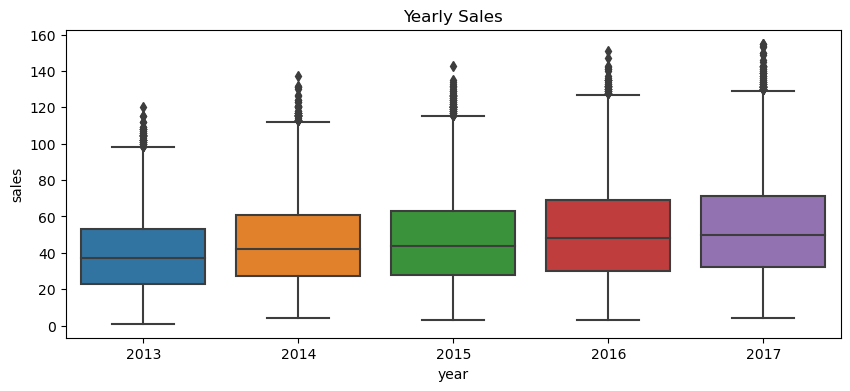

In [33]:
# boxplot for yearly sale
plt.figure(figsize=(10,4))

sns.boxplot(x=complete_df_store1['year'], y=complete_df_store1['sales'])
plt.title('Yearly Sales')
plt.show()

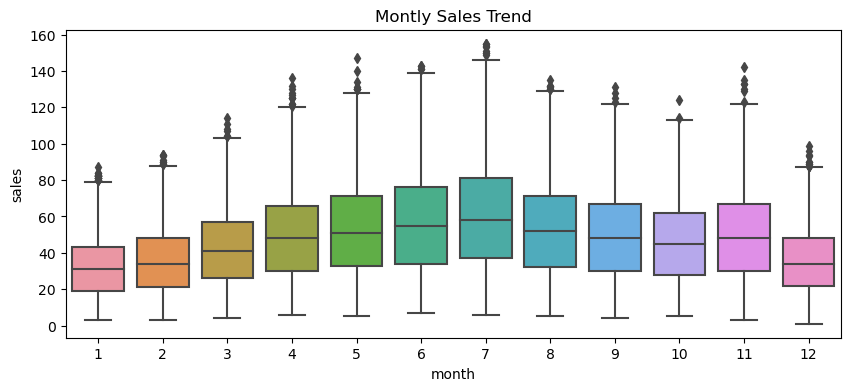

In [34]:
# boxplot for monthly sales
plt.figure(figsize=(10,4))

sns.boxplot(x=complete_df_store1['month'], y=complete_df_store1['sales'], )
plt.title('Montly Sales Trend')
plt.show()

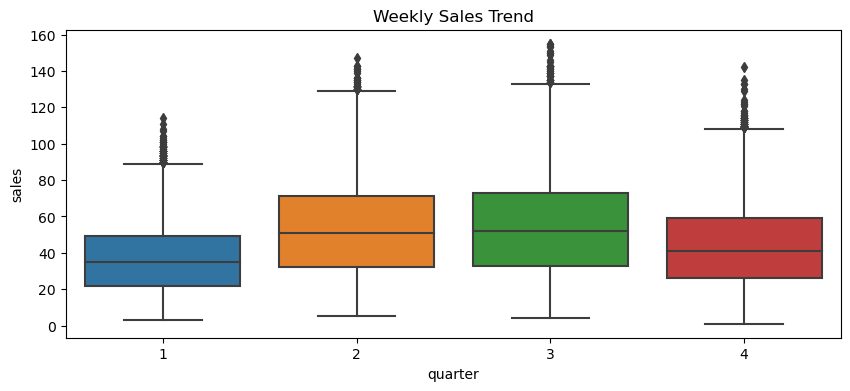

In [35]:
# boxplot for week's sales
plt.figure(figsize=(10,4))

sns.boxplot(x=complete_df_store1['quarter'], y=complete_df_store1['sales'], )
plt.title('Weekly Sales Trend')
plt.show()

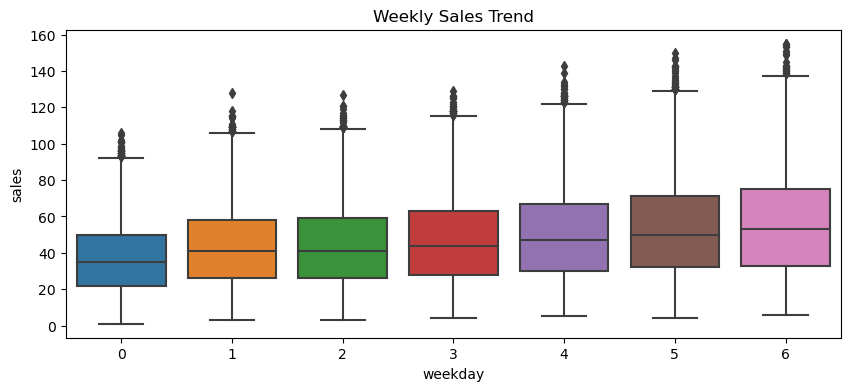

In [36]:
# boxplot for week's sales
plt.figure(figsize=(10,4))

sns.boxplot(x=complete_df_store1['weekday'], y=complete_df_store1['sales'], )
plt.title('Weekly Sales Trend')
plt.show()

mid-quarter periods have consistently higher sales compared to other quarters

Text(0.5, 1.0, 'Daily sales mean')

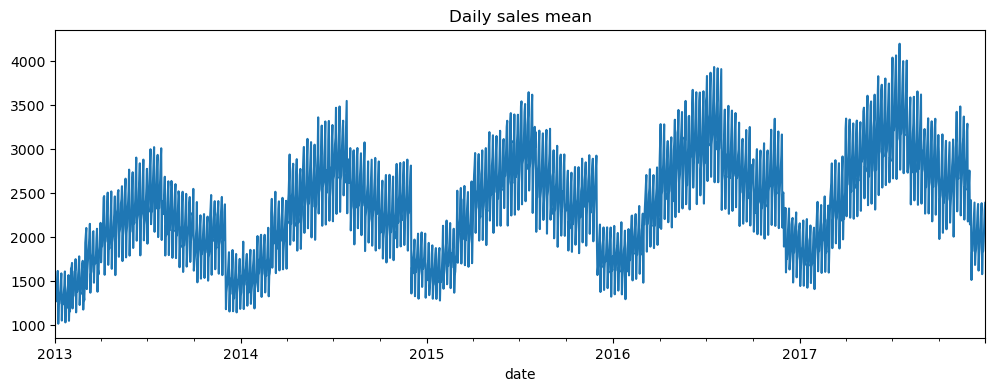

In [37]:
#Daily sales mean of store 1
store1_daily['sales'].plot(figsize=(12,4))
plt.title("Daily sales mean")

Text(0.5, 1.0, 'Monthly sales mean')

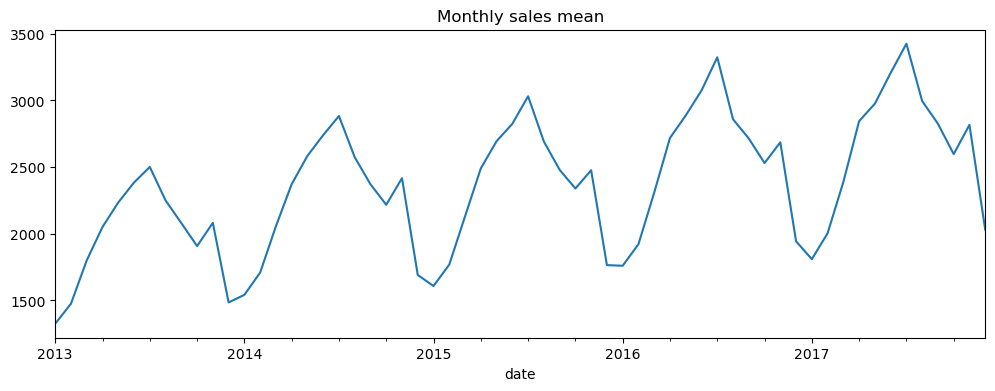

In [38]:
#Monthly sales mean of store 1
store1_monthly['sales'].plot(figsize=(12,4))
plt.title("Monthly sales mean")

Text(0.5, 1.0, 'Yearly sales mean')

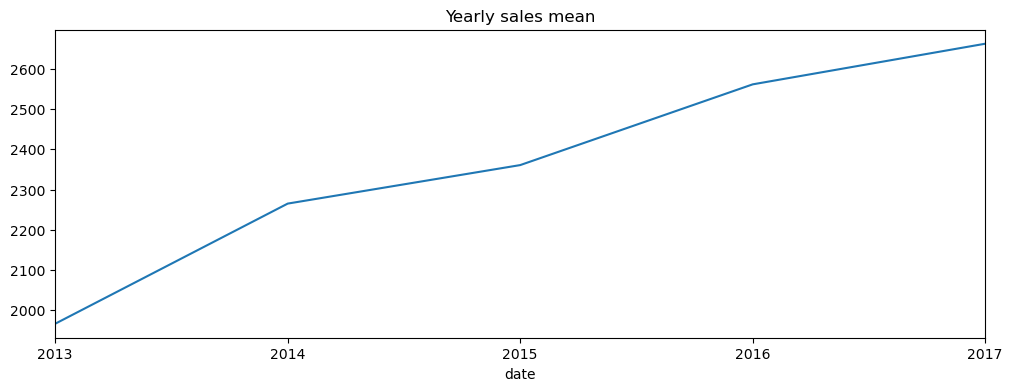

In [39]:
#Yearly sales mean of store 1
store1_yearly['sales'].plot(figsize=(12,4))
plt.title("Yearly sales mean")

<AxesSubplot:xlabel='date'>

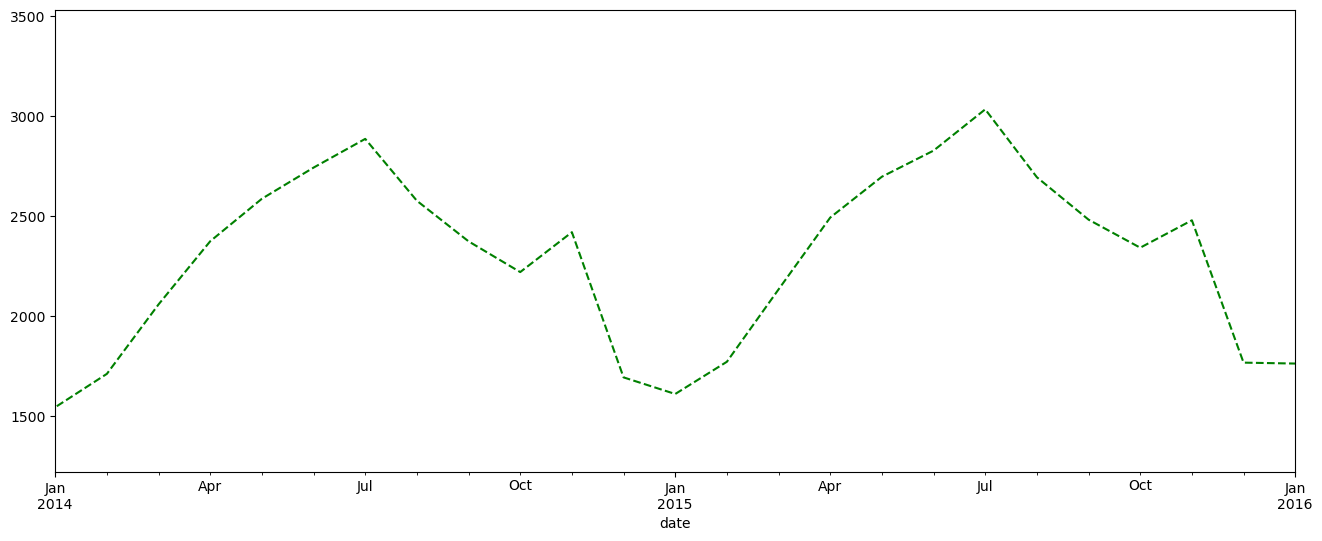

In [40]:
store1_monthly['sales'].plot(xlim=['2014-01-01','2016-01-31'],figsize=(16,6),ls='--',c='green')

There is an upward seasonality trend. July has highest monthly sales.

**Decompose Series**

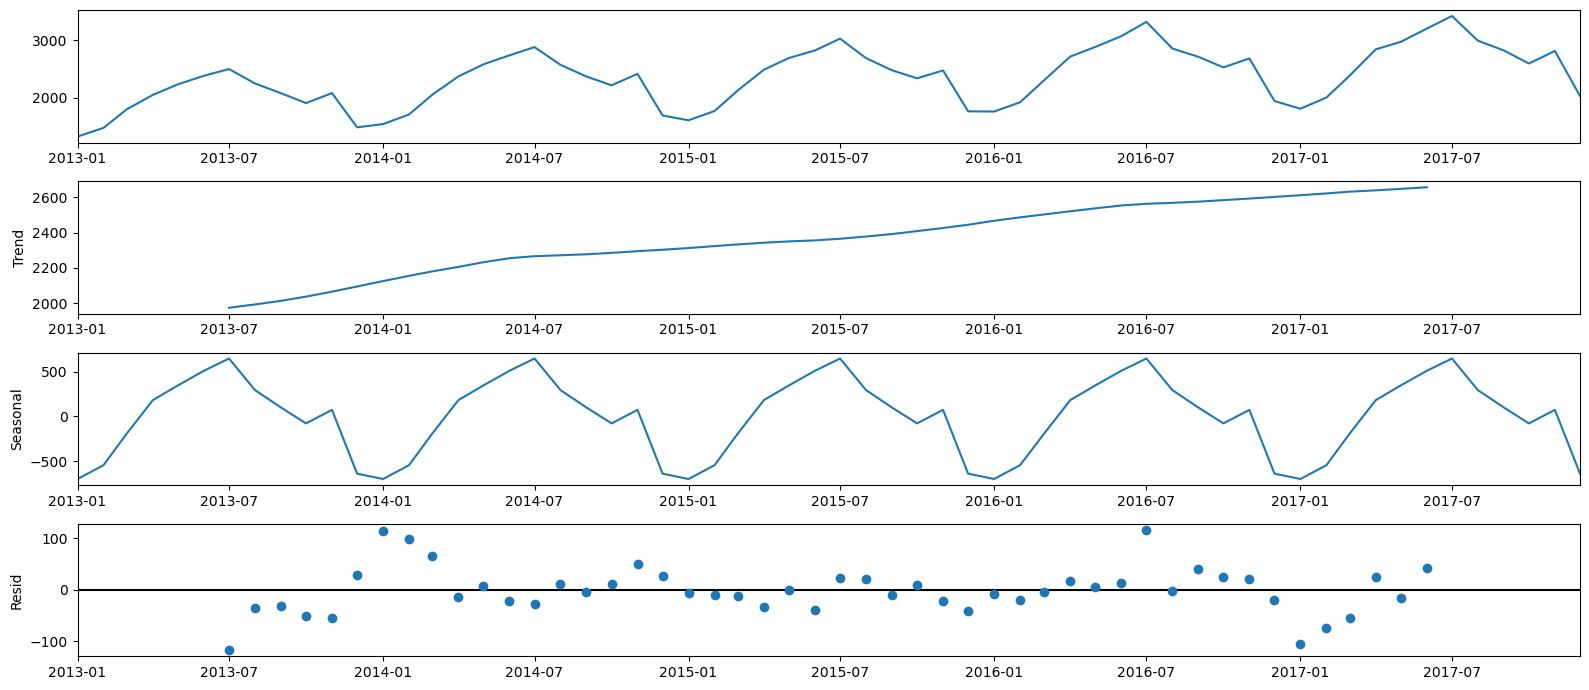

In [41]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store1_monthly, model='additive')
fig = decomposition.plot()
plt.show()

**ARIMA Model and SARIMA Model**

**Stationarity Checking**


**Dickey Fuller Test**

ADF test is conducted with the following assumptions.

* Null Hypothesis (HO): Series is non-stationary.

* Alternate Hypothesis(HA): Series is stationary.

* If the null hypothesis is failed to be rejected, this test may provide evidence that the series is non-stationary.

Conditions to Reject Null Hypothesis(HO)

* If Test statistic < Critical Value and p-value < 0.05 – Reject Null Hypothesis(HO) i.e., time series is stationary. It does not have a time-dependent structure.

In [42]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

If P-value is greater than 5%, which means we cannot build a model on Non-stationary data so we have to make the time series stationary. To make time-series stationary if it is not, we can do differencing

In [43]:
adf_test(store1_monthly['sales'])

ADF Statistics: -5.165600152001801
p-value: 1.0330971280153451e-05
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


**Rolling mean test**

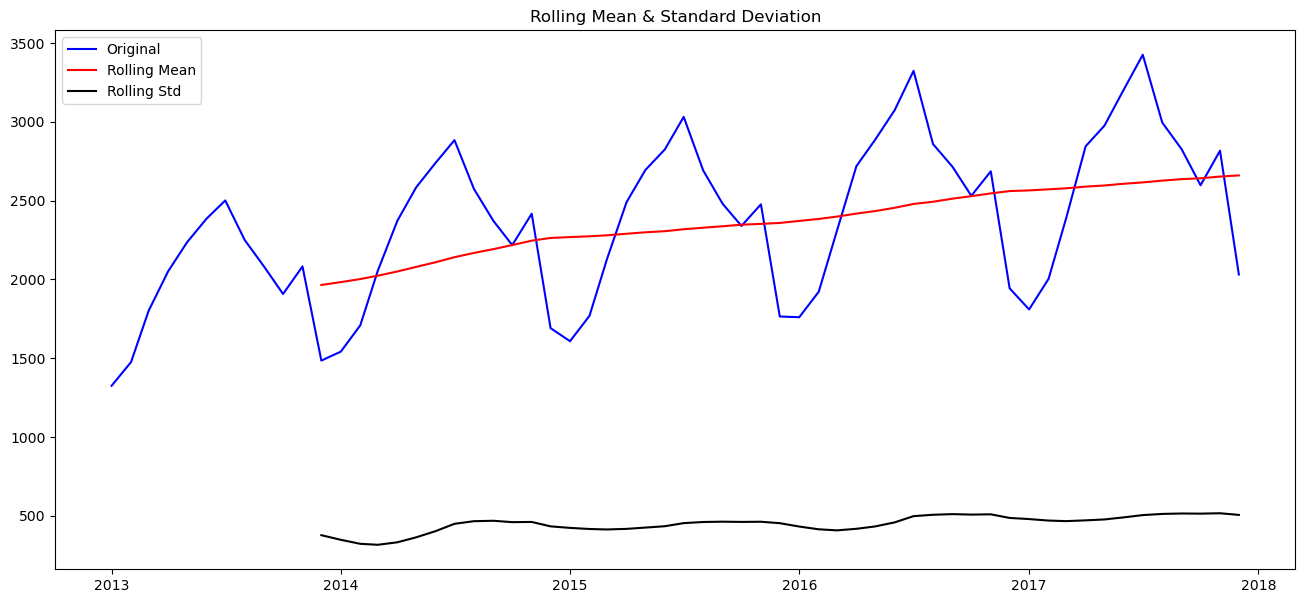

In [44]:
rolling_mean = store1_monthly.rolling(window=12).mean()
rolling_std = store1_monthly.rolling(window=12).std()

plt.plot(store1_monthly, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

The rolling mean and standard deviation, both are almost horizontal. So time series is stationary.

**Get p,d,q for ARIMA**

**ACF and PACF plot**

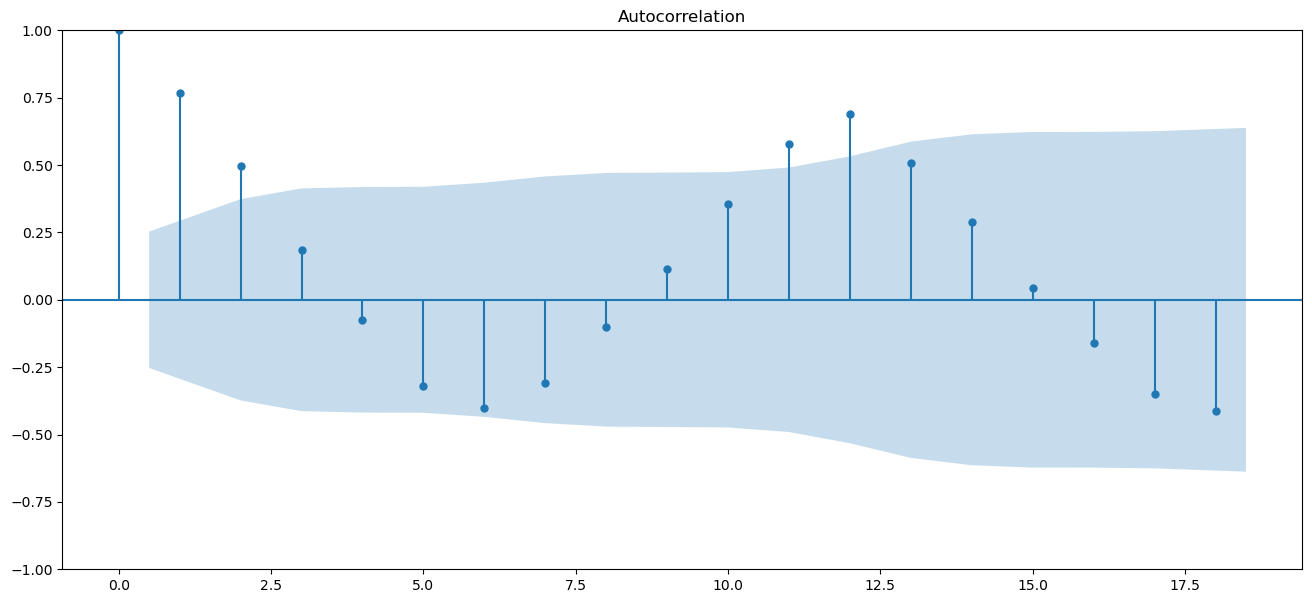

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(store1_monthly["sales"])

MA (q) = number of lagged forecasts error in the predictions

take q = 14

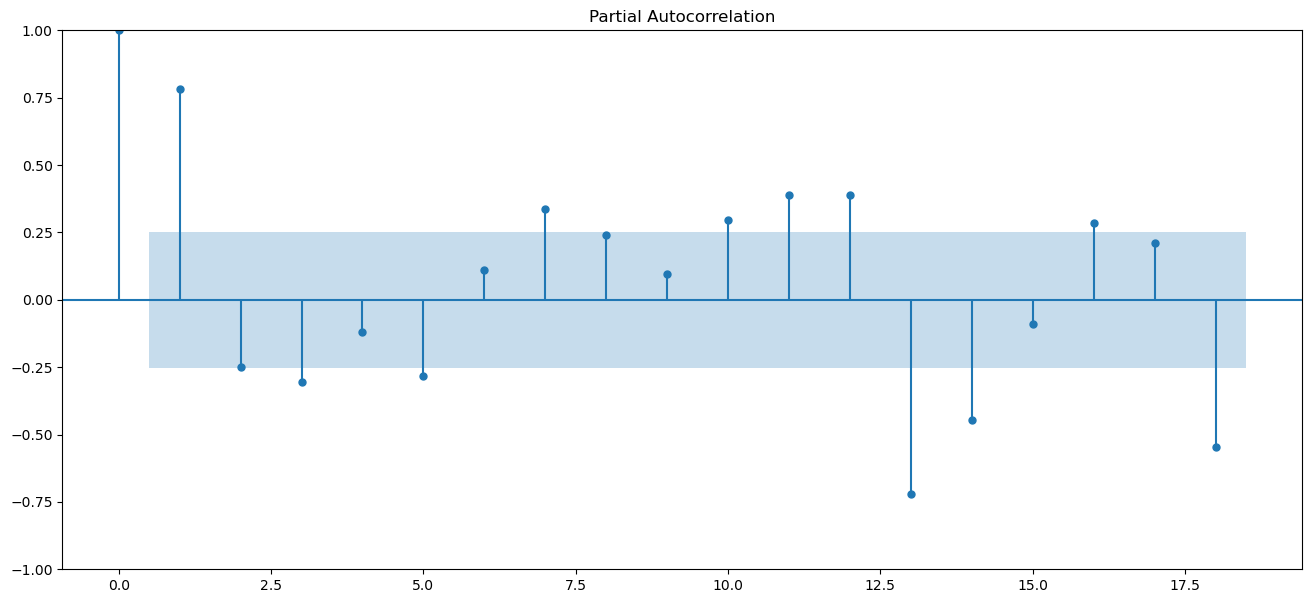

In [46]:
pacf = plot_pacf(store1_monthly["sales"])

AR (p) = number of auto-regressive terms

From PACF plot, p = 11 (no of lags crossing upper and lower band)

**ARIMA Model**

In [47]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(store1_monthly,order=(11,0,14))
model_fit=model.fit()
model_fit.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   60
Model:               ARIMA(11, 0, 14)   Log Likelihood               -1980.106
Date:                Thu, 24 Aug 2023   AIC                           4014.212
Time:                        03:10:54   BIC                           4070.760
Sample:                    01-01-2013   HQIC                          4036.331
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2361.2726        nan        nan        nan         nan         nan
ar.L1         -0.0089      0.010     -0.897      0.370      -0.028       0.011
ar.L2          0.9926      0.010    103.996      0.000       0.974       1.011
ar.L3         -0.9825      0.002   -397.178      0.000      -0.987      -0.978
ar.L4          0.0340      0.010      3.286      0.001       0.014       0.054
ar.L5          1.0035      0.011     89.406      0.000       0.981       1.025
ar.L6         -1.0578      0.005   -198.154      0.000      -1.068      -1.047
ar.L7          0.0681      0.010      6.698      0.000       0.048       0.088
ar.L8          0.9300      0.010     90.037      0.000       0.910       0.950
ar.L9         -1.0290      0.003   -340.362      0.000      -1.035      -1.023
ar.L10         0.1012      0.009     11.035      0.000       0.083       0.119
ar.L11         0.9488      0.010     98.783      0.000       0.930       0.968
ma.L1          0.1366      0.087      1.562      0.118      -0.035       0.308
ma.L2         -0.2770      0.314     -0.883      0.377      -0.892       0.338
ma.L3          1.4935      0.562      2.656      0.008       0.391       2.596
ma.L4         -0.4627      0.375     -1.235      0.217      -1.197       0.272
ma.L5          0.1710      0.144      1.184      0.236      -0.112       0.454
ma.L6          1.5854      0.063     25.085      0.000       1.462       1.709
ma.L7         -0.8654      0.124     -6.990      0.000      -1.108      -0.623
ma.L8          0.8863      0.154      5.751      0.000       0.584       1.188
ma.L9          0.9591      0.408      2.352      0.019       0.160       1.758
ma.L10        -0.8978      0.436     -2.058      0.040      -1.753      -0.043
ma.L11         1.0436      0.345      3.026      0.002       0.368       1.719
ma.L12         0.5790      0.165      3.505      0.000       0.255       0.903
ma.L13        -0.0553      0.044     -1.252      0.211      -0.142       0.031
ma.L14         0.4773      0.010     46.181      0.000       0.457       0.498
sigma2        87.4234        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                 0.72
Prob(Q):                              0.45   Prob(JB):                         0.70
Heteroskedasticity (H):               1.86   Skew:                             0.16
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.25e+21. Standard errors may be unstable.
"""

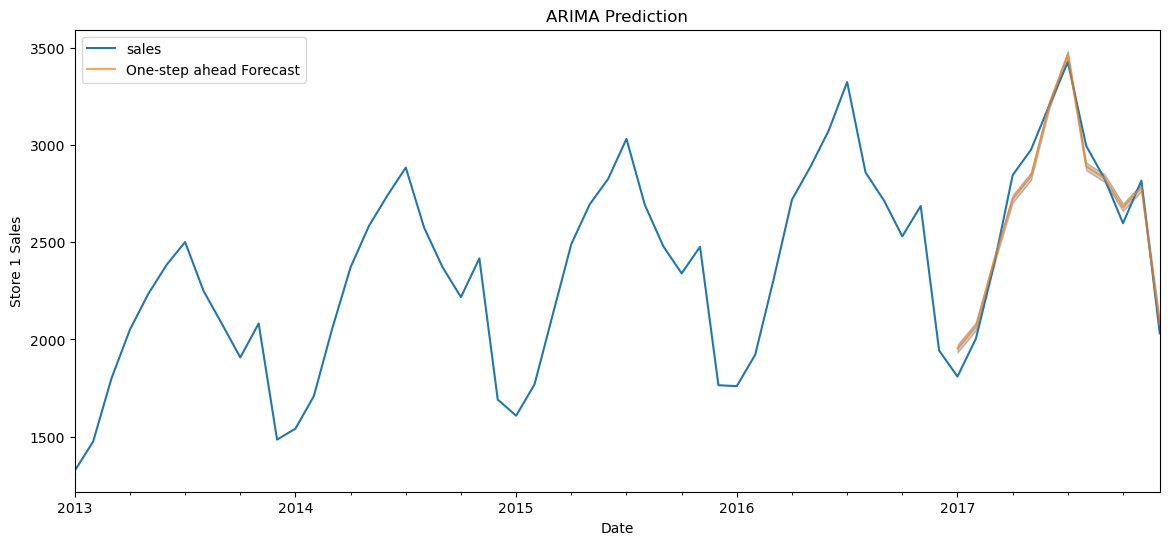

In [48]:
pred = model_fit.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = store1_monthly['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 6))

ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)

plt.title("ARIMA Prediction")
plt.xlabel('Date')
plt.ylabel('Store 1 Sales')
plt.legend()
plt.show()

In [49]:
comp = pd.DataFrame()
comp['Store1 Sales'] = store1_monthly['2017':]
comp['ARIMA_Prediction'] = pred.predicted_mean
comp

,Store1 Sales,ARIMA_Prediction
date,,
2017-01-01,1809.225806,1953.337452
2017-02-01,2003.500000,2066.853920
2017-03-01,2388.290323,2407.550044
2017-04-01,2844.600000,2722.963436
2017-05-01,2975.741935,2840.037790
2017-06-01,3206.266667,3207.873386
2017-07-01,3425.387097,3464.151782
2017-08-01,2995.354839,2889.029940
2017-09-01,2825.300000,2829.383213


In [50]:
#Validating ARIMA Predictions - MSE, RMSE
monthly_forecasted_arima = pred.predicted_mean
monthly_truth = store1_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(monthly_truth, monthly_forecasted_arima)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE) of forecasts: {}'.format(round(mse, 2)))
print('Root Mean Squared Error (RMSE) of forecasts: {}'.format(round(rmse, 2)))

Mean Squared Error (MSE) of forecasts: 6776.89
Root Mean Squared Error (RMSE) of forecasts: 82.32


In [51]:
ARIMA_RMSE = round(np.sqrt(mse), 2)
Store1_RMSE = pd.DataFrame([ARIMA_RMSE], columns=['ARIMA_RMSE'],index = ['Store1'])
Store1_RMSE

,ARIMA_RMSE
Store1,82.32


**Seasonal ARIMA Model**

In [52]:
import itertools

p = d = q = range(0, 2)
parameters = list(itertools.product(p, d, q))
seasonal_parameters = [(x[0], x[1], x[2], 12) for x in parameters]

examples = [(1, 1), (1, 2), (2, 3), (2, 4)]

print('Examples of parameter combinations for Seasonal ARIMA...')
for i, example in enumerate(examples):
    print('SARIMAX: {} x {}'.format(parameters[example[0]], seasonal_parameters[example[1]]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [53]:
import statsmodels.api as sm
import itertools

# Define the parameter grids
p = d = q = range(0, 2)  
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Loop through the parameter grids
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store1_monthly, order=param,
                                           seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                           enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1089.194705033009
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:821.0328318397701
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:631.7347785214846


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1380.8281047294522
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:582.6356883259803
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:557.6115265303679
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:436.5954026246267


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1240.1562533753647
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1005.2997669914485
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:756.6101403389689
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:566.7733423426482


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1436.136618157983
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:548.1136625618079
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:522.6463101898521
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:414.65968992857705


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1319.0640541529474
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:833.2719769967964
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:630.4159283318469
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:499.15480323526174


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1600.3409321716476
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:504.1870016995302
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:493.24201213405064
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:375.78949576326124


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1158.235388161655
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:819.43993343222
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:617.1621888332461
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:490.64510358549586


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:1391.7851095716762
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:504.49358412258164
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:482.2234767411627
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:372.02338809871947


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:1404.814564402741
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:848.7450207319757
SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:645.6260797873801
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:509.6136316239972


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1480.5313218558938
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:502.54077395205024
SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:500.9096664024334
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:377.0296151354375
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:1359.1852499837494
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:835.6438429950489
SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:633.5973536262716
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:501.21626567965325
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:1440.5793753184564
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:503.65231500031695
SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:491.12832880936963
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:374.5043460726059
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:1323.2433908960727
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:833.1948721389338
SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:630.6209241056438
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:500.6764708340576


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1345.4102457174317
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:494.9079450720734
SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:491.74469545355095
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:361.5886735578524


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1327.2152535011112
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:820.6088652049264
SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:618.9827122916812
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:492.6284391730536


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1095.6529207573174
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:496.8128069147472
SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:487.3494308584549
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:363.174525672193
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1105.833816137402


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**Fitting the SARIMA Model using the Optimal parameters**

Seasonal Autoregressive Integrated Moving Average (SARIMA)

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(store1_monthly, order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
results = model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -253.056
Date:                            Thu, 24 Aug 2023   AIC                            512.111
Time:                                    03:11:16   BIC                            517.661
Sample:                                01-01-2013   HQIC                           514.200
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1167      0.127     -0.917      0.359      -0.366       0.133
ar.S.L12      -0.1275      0.176   

**Model diagnostics**

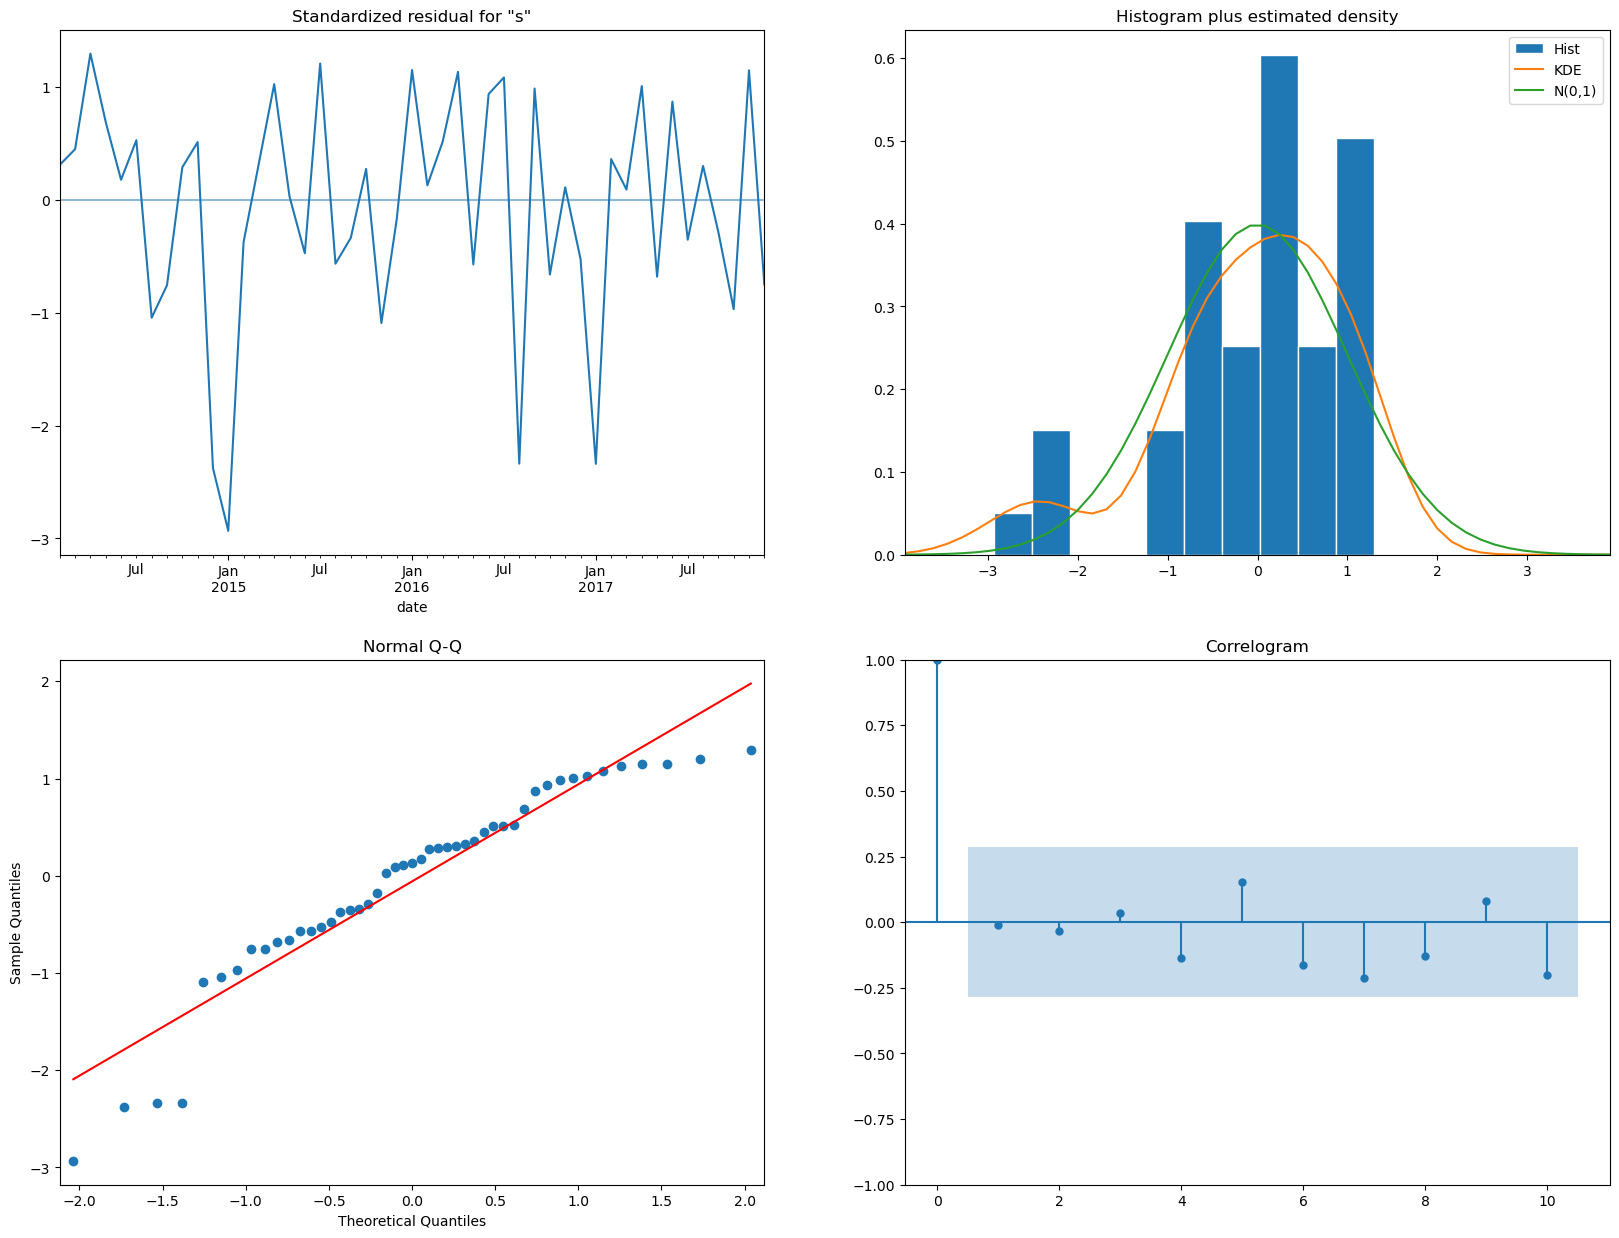

In [55]:
results.plot_diagnostics(figsize=(20,15))
plt.show()

**Prediction using SARIMA Model**

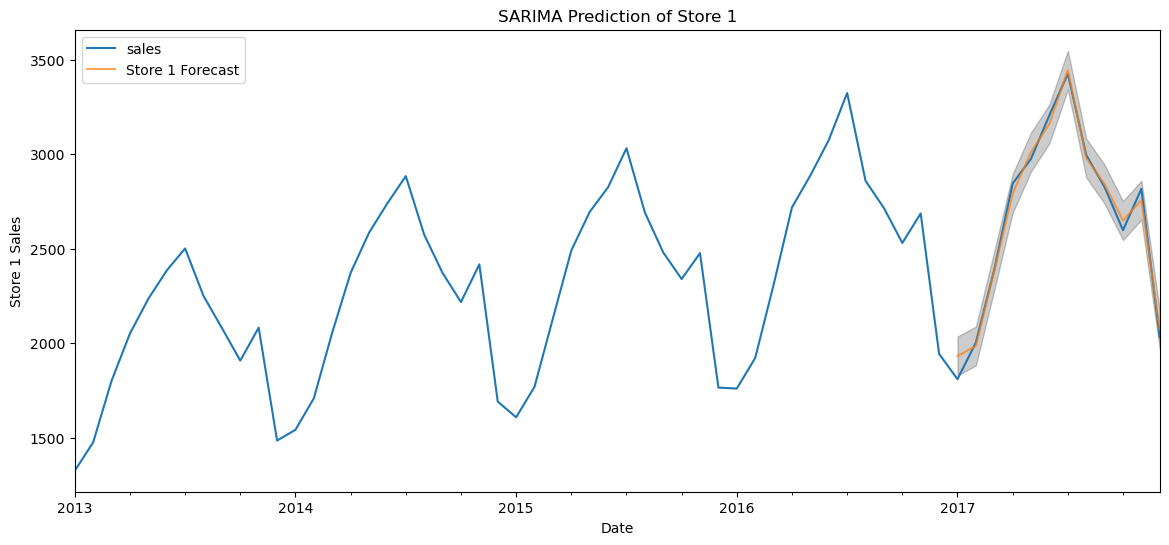

In [56]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = store1_monthly['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Store 1 Forecast', alpha=0.7, figsize=(14, 6))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=0.2)

plt.title("SARIMA Prediction of Store 1")
ax.set_xlabel('Date')
ax.set_ylabel('Store 1 Sales')
plt.legend()
plt.show()

In [57]:
comp['SARIMA_Prediction']=pred.predicted_mean
comp

,Store1 Sales,ARIMA_Prediction,SARIMA_Prediction
date,,,
2017-01-01,1809.225806,1953.337452,1932.203587
2017-02-01,2003.500000,2066.853920,1984.614559
2017-03-01,2388.290323,2407.550044,2383.556606
2017-04-01,2844.600000,2722.963436,2791.721769
2017-05-01,2975.741935,2840.037790,3011.586155
2017-06-01,3206.266667,3207.873386,3160.620970
2017-07-01,3425.387097,3464.151782,3444.014539
2017-08-01,2995.354839,2889.029940,2979.636785
2017-09-01,2825.300000,2829.383213,2840.419708


**Validating SARIMA Prediction - MSE, RMSE**

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

monthly_forecasted_sarima = pred.predicted_mean
monthly_truth = store1_monthly['2017-01-01':]

mse = mean_squared_error(monthly_truth, monthly_forecasted_sarima)
rmse = np.sqrt(mse)

print('The Mean Squared Error of the forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of the forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of the forecasts is 2522.63
The Root Mean Squared Error of the forecasts is 50.23


In [59]:
Store1_RMSE['SARIMA_RMSE'] = round(np.sqrt(mse), 2)
Store1_RMSE

,ARIMA_RMSE,SARIMA_RMSE
Store1,82.32,50.23


**Future Forecasting using SARIMA**

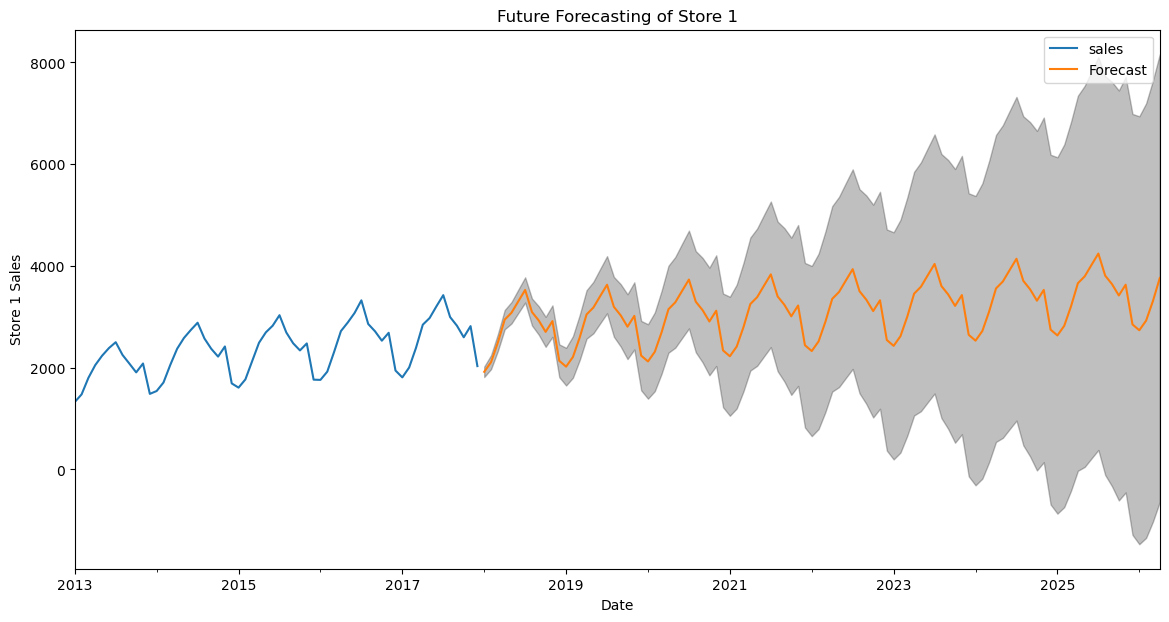

In [60]:
"< pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = store1_monthly.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k',
                alpha=0.25)

plt.title("Future Forecasting of Store 1")
ax.set_xlabel('Date')
ax.set_ylabel('Store 1 Sales')
plt.legend()
plt.show()